# Imports

In [ ]:
%reset -f
import numpy as np
import pandas as pd

# Transform inputs to pandas dataframe

## Stock Index

In [ ]:
### SPY Price & Volume
#### https://uk.finance.yahoo.com/quote/SPY/history
spy_df = pd.read_csv('./inputFeatures/stockIndex/SPY.csv',
    index_col=["Date"], 
    usecols=["Date", "SPYClose", "Volume"],
    parse_dates=["Date"])

### VIX (Volatility Index)
#### https://uk.finance.yahoo.com/quote/%5EVIX/history
vix_df = pd.read_csv('./inputFeatures/stockIndex/VIX.csv',
    index_col=["Date"], 
    usecols=["Date", "VIXClose"],
    parse_dates=["Date"])

## Money availability

In [ ]:
### M1 Money Supply
#### Board of Governors of the Federal Reserve System (US), M1 [WM1NS],
#### retrieved from FRED, Federal Reserve Bank of St. Louis;
#### https://fred.stlouisfed.org/series/WM1NS, March 31, 2022.
m1_df = pd.read_csv('./inputFeatures/moneyAvailability/WM1NS.csv',
    index_col=["Date"],
    parse_dates=["Date"])

### Employment Rate
#### Organization for Economic Co-operation and Development,
#### Employment Rate: Aged 15-64: All Persons for the United States
#### [LREM64TTUSM156S], retrieved from FRED,
#### Federal Reserve Bank of St. Louis;
#### https://fred.stlouisfed.org/series/LREM64TTUSM156S, March 31, 2022.
employment_df = pd.read_csv('./inputFeatures/moneyAvailability/EmploymentRate.csv',
    index_col=["Date"],
    parse_dates=["Date"])

### Inflation Rate
## data.bls.gov
inflation_df = pd.read_csv('./inputFeatures/moneyAvailability/InflationRate.csv',
    index_col=["Date"],
    parse_dates=["Date"])

### GDP Rate
#### U.S. Bureau of Economic Analysis, Gross Domestic Product [GDP], retrieved from FRED,
#### Federal Reserve Bank of St. Louis;
#### https://fred.stlouisfed.org/series/GDP, March 31, 2022.
gdp_df = pd.read_csv('./inputFeatures/moneyAvailability/GDP.csv',
    index_col=["Date"],
    parse_dates=["Date"])

## Sentiment

In [ ]:
### Put Call Ratio
#### https://www.alphalerts.com/live-historical-equity-pcr/
pcr_df = pd.read_csv('./inputFeatures/sentimentIndicators/PCR.csv',
    index_col=['Date'],
    parse_dates=['Date'])

### Consumer Sentiment
#### Surveys of Consumers, University of Michigan: Consumer Sentiment © [UMCSENT]
#### retrieved from FRED, Federal Reserve Bank of St. Louis;
#### https://fred.stlouisfed.org/series/UMCSENT, March 31, 2022.
umcsent_df = pd.read_csv('./inputFeatures/sentimentIndicators/UMCSENT.csv',
    index_col=['Date'],
    parse_dates=['Date'])

### Consumer Confidence
#### Organization for Economic Co-operation and Development, Organization for Economic Co-operation and Development:
#### Main Economic Indicators (database),http://dx.doi.org/10.1787/data-00052-en
#### retrieved from FRED, Federal Reserve Bank of St. Louis;
#### https://fred.stlouisfed.org/series/CSCICP03USM665S, March 31, 2022.
confidence_df = pd.read_csv('./inputFeatures/sentimentIndicators/CSCICP03USM665S.csv',
    index_col=['Date'],
    parse_dates=['Date'])

## Portfolio Allocations

In [ ]:
### Treasury Yield Rates
#### https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve
treasury_df = pd.read_csv('./inputFeatures/portfolioAllocations/treasury/daily-treasury-rates.csv',
    index_col=['Date'],
    parse_dates=['Date'])

### Effective Funds Rate
#### Federal Reserve Bank of New York, Effective Federal Funds Rate [EFFR],
#### retrieved from FRED, Federal Reserve Bank of St. Louis;
#### https://fred.stlouisfed.org/series/EFFR, March 31, 2022.
effr_df = pd.read_csv('./inputFeatures/portfolioAllocations/treasury/EFFR.csv',
    index_col=['Date'],
    parse_dates=['Date'])

### Accepted Repurchase Agreements (Repo) by the Federal Reserve
#### Federal Reserve Bank of New York, Overnight Repurchase Agreements:
#### Treasury Securities Purchased by the Federal Reserve in the Temporary Open Market Operations [RPONTSYD],
#### retrieved from FRED, Federal Reserve Bank of St. Louis;
#### https://fred.stlouisfed.org/series/RPONTSYD, March 31, 2022.
#### https://www.newyorkfed.org/markets/desk-operations/repo
repo_df = pd.read_csv('./inputFeatures/portfolioAllocations/treasury/REPO.csv',
    index_col=['Date'],
    parse_dates=['Date'])

### Accepted Reverse Repurchase Agreements (Reverse Repo) by the Federal Reserve
#### Federal Reserve Bank of New York, Overnight Reverse Repurchase Agreements:
#### Treasury Securities Sold by the Federal Reserve in the Temporary Open Market Operations [RRPONTSYD],
#### retrieved from FRED, Federal Reserve Bank of St. Louis;
#### https://fred.stlouisfed.org/series/RRPONTSYD, March 31, 2022.
reverse_repo_df = pd.read_csv('./inputFeatures/portfolioAllocations/treasury/REVERSEREPO.csv',
    index_col=['Date'],
    parse_dates=['Date'])

### Gold Rate
#### https://www.lbma.org.uk/prices-and-data/precious-metal-prices#/table
gold_df = pd.read_csv('./inputFeatures/portfolioAllocations/commodities/gold.csv',
    index_col=['Date'],
    parse_dates=['Date'])

### JPY Rate
#### Board of Governors of the Federal Reserve System (US),
#### Japanese Yen to U.S. Dollar Spot Exchange Rate [DEXJPUS],
#### retrieved from FRED, Federal Reserve Bank of St. Louis;
#### https://fred.stlouisfed.org/series/DEXJPUS, April 3, 2022.
jpy_df = pd.read_csv('./inputFeatures/portfolioAllocations/currency/JPY.csv',
    index_col=['Date'],
    parse_dates=['Date'])
         
eur_df = pd.read_csv('./inputFeatures/portfolioAllocations/currency/EUR.csv',
    index_col=['Date'],
    parse_dates=['Date'])

gbp_df = pd.read_csv('./inputFeatures/portfolioAllocations/currency/GBP.csv',
    index_col=['Date'],
    parse_dates=['Date'])

# Combined Table

In [ ]:
### Necessary functions
def get_most_recent_value(date, lookup_df, column_name):
    most_recent_date = [index for index in lookup_df.index if index <= date][-1]
    return lookup_df[column_name].loc[most_recent_date]

def calculate_percentage_change(index, number_of_days, lookup_df, column_name):
    if (index + number_of_days < 0):
        return None
    if (index == combined_df.shape[0] - 1):
        return None
    final_value = lookup_df.iloc[max(index, index + number_of_days)][column_name]
    starting_value = lookup_df.iloc[min(index, index + number_of_days)][column_name]
    return (final_value - starting_value) / abs(starting_value) * 100

dfs_to_combine = [
    vix_df,
    m1_df,
    employment_df,
    inflation_df,
    gdp_df,
    pcr_df,
    umcsent_df,
    confidence_df,
    treasury_df,
    effr_df,
    repo_df,
    reverse_repo_df,
    gold_df,
    jpy_df,
    eur_df,
    gbp_df]

combined_df = spy_df
combined_df = combined_df.join([df for df in dfs_to_combine])

combined_df = combined_df[~combined_df.index.duplicated(keep='first')]

for date in combined_df.index:
    integer_location = combined_df.index.get_loc(date)

    ### Fill in any gaps that may remain as a result of mismatched reported dates
    ### This will repeat values in dates where there are extended periods without values
    ### e.g. quarterly, monthly, weekly values
    combined_df.at[date, 'M1Supply'] = get_most_recent_value(date, m1_df, 'M1Supply')
    combined_df.at[date, 'EmploymentRate'] = get_most_recent_value(date, employment_df, 'EmploymentRate')
    combined_df.at[date, 'InflationRate'] = get_most_recent_value(date, inflation_df, 'InflationRate')
    combined_df.at[date, 'GDP'] = get_most_recent_value(date, gdp_df, 'GDP')
    combined_df.at[date, 'UMCSENT'] = get_most_recent_value(date, umcsent_df, 'UMCSENT')
    combined_df.at[date, 'Confidence'] = get_most_recent_value(date, confidence_df, 'Confidence')

    ### Fill in gaps in treasury returns (due to bank holidays but market open)
    ### by averaging the surrounding values if available
    single_missing_value_columns = [
        '1Mo', '3Mo', '1Yr', '2Yr', '5Yr', '10Yr', '20Yr', '30Yr',
        'Repo', 'RepoRate', 'ReverseRepo', 'ReverseRepoRate', 'Price'
    ]

    for single_missing_value_column in single_missing_value_columns:
        if (np.isnan(combined_df.at[date, single_missing_value_column])):
            surrounding_values = combined_df.loc[
                [combined_df.index[integer_location - 1], combined_df.index[integer_location + 1]],
                single_missing_value_column
            ].values
            
            if not (np.isnan(surrounding_values).any()):
                combined_df.at[date, single_missing_value_column] = np.mean(surrounding_values)

    combined_df['Repo'] = combined_df['Repo'].fillna(0.001)
    combined_df['RepoRate'] = combined_df['RepoRate'].fillna(0.001)
    combined_df['ReverseRepo'] = combined_df['ReverseRepo'].fillna(0.001)
    combined_df['ReverseRepoRate'] = combined_df['ReverseRepoRate'].fillna(0.001)

combined_df[combined_df < 0.001] = 0.001
# combined_df.to_excel("./inputFeatures/combined.xlsx")

# Preprocessing Functions

In [ ]:
from sklearn import preprocessing
from collections import deque
from time import time

SEQ_LEN = 63
FUTURE_PERIOD_PREDICT = 1

def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0

def preprocess_df(df):
    # 'RepoRate', 'ReverseRepoRate', 'Repo', 'ReverseRepo', 'USDGBP', 'USDEUR', 'USDJPY', 'M1Supply', 'EmploymentRate', 'InflationRate', 'GDP', 'PCR', 'UMCSENT', 'Confidence', 'EFFR'
    df = df.drop(columns=['future'])

    output_df = pd.DataFrame(index=df.index)

    for col in df.columns:
        if col == 'SPYClose':
            for number_of_days in [1, 2, 5, 21, 63]:
                column_name = f'{col}{number_of_days}DayChange'
                output_df = pd.concat([output_df, df[col].pct_change(number_of_days, fill_method='ffill').rename(column_name)], axis=1)
                output_df.dropna(inplace=True)
                output_df[column_name] = preprocessing.scale(output_df[column_name].values)
                output_df[column_name] = output_df[column_name].clip(-3, 3) / 3
        elif col in ['Volume', 'VIXClose', 'PCR', '1Mo', '3Mo', '1Yr', '2Yr', '5Yr', '10Yr', '20Yr', '30Yr', 'EFFR', 'Repo', 'RepoRate', 'ReverseRepo', 'ReverseRepoRate', 'Price', 'USDJPY', 'USDEUR', 'USDGBP']:
            column_name = f'{col}DayChange'
            output_df = pd.concat([output_df, df[col].pct_change(fill_method='ffill').rename(column_name)], axis=1)
        elif col == 'M1Supply':
            column_name = f'{col}WeekChange'
            output_df = pd.concat([output_df, df[col].pct_change(7, fill_method='ffill').rename(column_name)], axis=1)
        elif col in ['EmploymentRate', 'InflationRate', 'UMCSENT', 'Confidence']:
            column_name = f'{col}MonthChange'
            output_df = pd.concat([output_df, df[col].pct_change(24, fill_method='ffill').rename(column_name)], axis=1)
        elif col == 'GDP':
            column_name = f'{col}QuarterChange'
            output_df = pd.concat([output_df, df[col].pct_change(65, fill_method='ffill').rename(column_name)], axis=1)
        elif col == 'target':
            output_df[col] = df[col]

        if col not in ['SPYClose', 'target']:
            output_df.dropna(inplace=True)
            output_df[column_name] = preprocessing.scale(output_df[column_name].values)
            output_df[column_name] = output_df[column_name].clip(-3, 3) / 3

    output_df.dropna(inplace=True)

    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(maxlen=SEQ_LEN)
    
    for i in output_df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN:  # make sure we have 21 sequences!
            sequential_data.append([np.array(prev_days), i[-1]])  # append those bad boys!
            
    np.random.shuffle(sequential_data)  # shuffle for good measure.
    ups = []
    downs = []

    for sequence, target in sequential_data:    
        if target == 0:
            downs.append([sequence, target])
        elif target == 1:
            ups.append([sequence, target])
    np.random.shuffle(ups)
    np.random.shuffle(downs)

    ## Get the value of the array with the smallest length
    ## So we can ensure the training process is unbiased
    ## As there will be 50:50 of up days and down days.
    ## The model has to LEARN rather than REMEMBER
    lower = min(len(ups), len(downs))

    ups = ups[:lower]
    downs = downs[:lower]

    sequential_data = ups + downs

    np.random.shuffle(sequential_data)

    X = []
    y = []

    for sequence, target in sequential_data:
        X.append(sequence)
        y.append(target)

    return np.array(X), np.array(y)

# Apply preprocessing, arrange data (training, validation)

In [ ]:
# Add column for next day's closing price
combined_df['future'] = combined_df['SPYClose'].shift(-1)
# Add column to signify if next day's closing price is up (1) or down (0) using classify
# function defined above
combined_df['target'] = list(map(classify, combined_df['SPYClose'], combined_df['future']))


times = sorted(combined_df.index.values)
last_20pct = sorted(combined_df.index.values)[-int(0.2*len(times))]  # get the last 20% of the times

## Split in sample / out of sample
validation_df = combined_df[(combined_df.index >= last_20pct)]  # make the validation data where the index is in the last 20%
training_df = combined_df[(combined_df.index < last_20pct)]  # now the combined_df is all the data up to the last 20%

train_x, train_y = preprocess_df(training_df)
validation_x, validation_y = preprocess_df(validation_df)

print(f"train data: {len(train_x)} validation: {len(validation_x)}")
print(f"Dont buys: {np.count_nonzero(train_y == 0)}, buys: {np.count_nonzero(train_y == 1)}")
print(f"VALIDATION Dont buys: {np.count_nonzero(validation_y == 0)}, buys: {np.count_nonzero(validation_y == 1)}")

# Tensorflow Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, BatchNormalization, Dense, Conv1D, MaxPooling1D, Flatten, Concatenate
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping


## Extract specific number of days for training from dataset

In [ ]:
def get_last_days(number_of_days, x):
    return np.delete(x, np.s_[:-number_of_days], 1)

# Use 21 days for initial tests
initial_train_x = get_last_days(21, train_x)
initial_validation_x = get_last_days(21, validation_x)

## Iteration 1 - LSTM

In [ ]:
def iteration_1():
    time_at_start = int(time())
    lstm_layers = [1, 2]
    dense_layers = [2, 3]
    lstm_layer_sizes = [32, 64]
    dense_layer_sizes = [32, 64]

    EPOCHS = 50
    BATCH_SIZE = 32

    for dense_layer in dense_layers:
        for dense_layer_size in dense_layer_sizes:
            for lstm_layer in lstm_layers:
                for lstm_layer_size in lstm_layer_sizes:
                    name = f"{lstm_layer}LSTM{lstm_layer_size}-{dense_layer}DENSE{dense_layer_size}-{int(time())}"

                    model = Sequential()
                    model.add(Input(shape=(initial_train_x.shape[1:])))

                    for layer in range(lstm_layer - 1):            
                        model.add(LSTM(lstm_layer_size, return_sequences=True))
                        model.add(Dropout(0.4))
                        model.add(BatchNormalization())

                    model.add(LSTM(lstm_layer_size))
                    model.add(Dropout(0.4))
                    model.add(BatchNormalization())

                    for layer in range(dense_layer - 1):
                        model.add(Dense(dense_layer_size, activation='relu'))
                        model.add(Dropout(0.4))

                    model.add(Dense(2, activation='softmax'))

                    opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

                    model.compile(loss='sparse_categorical_crossentropy',
                                    optimizer=opt,
                                    metrics=['accuracy'])

                    tensorboard = TensorBoard(log_dir=f'lstmiteration1logs-{time_at_start}/{name}')

                    checkpoint_filepath = f"lstmiteration1models-{time_at_start}/" + name + "-{epoch:02d}-{val_accuracy:.3f}.hd5"
                    checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

                    early_stopping = EarlyStopping(monitor='val_accuracy', baseline=0.5, patience=12)

                    history = model.fit(
                        initial_train_x, train_y,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(initial_validation_x, validation_y),
                        callbacks=[tensorboard, checkpoint, early_stopping]
                    )

## Iteration 2 - CNN

In [ ]:
def get_last(x):
    return x[-1]

number_of_features = train_x.shape[-1]
cnn_train_x = get_last_days(1, train_x)
cnn_validation_x = get_last_days(1, validation_x)

def iteration_2():
    time_at_start = int(time())
    conv_layers = [1, 2]
    conv_layer_sizes = [16, 32]
    dense_layers = [1, 2]
    dense_layer_sizes = [32, 64]

    EPOCHS = 50
    BATCH_SIZE = 32

    for dense_layer in dense_layers:
        for dense_layer_size in dense_layer_sizes:
                    for conv_layer in conv_layers:
                        for conv_layer_size in conv_layer_sizes:
                            name = f"{conv_layer}C{conv_layer_size}-{dense_layer}D{dense_layer_size}-{int(time())}"

                            model = Sequential()
                            model.add(Input(shape=(cnn_train_x.shape[1:])))

                            for layer in range(conv_layer - 1):
                                model.add(Conv1D(conv_layer_size, kernel_size=1, padding='valid', activation='relu'))
                                model.add(MaxPooling1D(1))
                    
                            model.add(Conv1D(conv_layer_size, kernel_size=1, padding='valid', activation='relu'))
                            model.add(MaxPooling1D(1))

                            model.add(Flatten())

                            for layer in range(dense_layer - 1):
                                model.add(Dense(dense_layer_size, activation='relu'))
                                model.add(Dropout(0.4))

                            model.add(Dense(2, activation='softmax'))

                            opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

                            model.compile(loss='sparse_categorical_crossentropy',
                                            optimizer=opt,
                                            metrics=['accuracy'])

                            tensorboard = TensorBoard(log_dir=f'cnniteration2logs-{time_at_start}/{name}')

                            checkpoint_filepath = f"cnniteration2models-{time_at_start}/" + name + "-{epoch:02d}-{val_accuracy:.3f}.hd5"
                            checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

                            early_stopping = EarlyStopping(monitor='val_accuracy', baseline=0.5, patience=12)

                            history = model.fit(
                                cnn_train_x, train_y,
                                batch_size=BATCH_SIZE,
                                epochs=EPOCHS,
                                validation_data=(cnn_validation_x, validation_y),
                                callbacks=[tensorboard, checkpoint, early_stopping]
                            )

## Iteration 3 - CNN + LSTM

In [ ]:
def iteration_3():
    time_at_start = int(time())
    conv_layers = [1,2]
    conv_layer_sizes = [16, 32]
    lstm_layers = [1,2]
    dense_layers = [2,3]
    lstm_layer_sizes = [16, 32]
    dense_layer_sizes = [32, 64]

    EPOCHS = 50
    BATCH_SIZE = 32

    for dense_layer in dense_layers:
        for dense_layer_size in dense_layer_sizes:
            for lstm_layer in lstm_layers:
                for lstm_layer_size in lstm_layer_sizes:
                    for conv_layer in conv_layers:
                        for conv_layer_size in conv_layer_sizes:
                            name = f"{conv_layer}C{conv_layer_size}-{lstm_layer}L{lstm_layer_size}-{dense_layer}D{dense_layer_size}-{int(time())}"

                            model = Sequential()
                            model.add(Input(shape=(initial_train_x.shape[1:])))
                            
                            for layer in range(conv_layer - 1):            
                                model.add(Conv1D(conv_layer_size, 2, padding='same'))
                                
                            model.add(Conv1D(conv_layer_size, 2, padding='same'))

                            for layer in range(lstm_layer - 1):            
                                model.add(LSTM(lstm_layer_size, return_sequences=True))
                                model.add(Dropout(0.4))
                                model.add(BatchNormalization())

                            model.add(LSTM(lstm_layer_size))
                            model.add(Dropout(0.4))
                            model.add(BatchNormalization())

                            for layer in range(dense_layer - 1):
                                model.add(Dense(dense_layer_size, activation='relu'))
                                model.add(Dropout(0.4))

                            model.add(Dense(2, activation='softmax'))

                            opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

                            model.compile(loss='sparse_categorical_crossentropy',
                                            optimizer=opt,
                                            metrics=['accuracy'])

                            tensorboard = TensorBoard(log_dir=f'cnnlstmiteration3logs-{time_at_start}/{name}')

                            checkpoint_filepath = f"cnnlstmiteration3models-{time_at_start}/" + name + "-{epoch:02d}-{val_accuracy:.3f}.hd5"
                            checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

                            early_stopping = EarlyStopping(monitor='val_accuracy', baseline=0.5, patience=12)

                            history = model.fit(
                                initial_train_x, train_y,
                                batch_size=BATCH_SIZE,
                                epochs=EPOCHS,
                                validation_data=(initial_validation_x, validation_y),
                                callbacks=[tensorboard, checkpoint, early_stopping]
                            )

In [ ]:
# iteration_1()

In [ ]:
# iteration_2()

In [ ]:
iteration_3()

## Iteration 4 - LSTM + CNN + CNNLSTM (concatenated)

In [ ]:
def iteration_4():
    # LSTM
    lstm_input = Input(shape=(initial_train_x.shape[1:]))
        
    lstm_lstm_1 = LSTM(64, return_sequences=True)(lstm_input)
    lstm_dropout_1 = Dropout(0.4)(lstm_lstm_1)
    lstm_bn_1 = BatchNormalization()(lstm_dropout_1)

    lstm_lstm_2 = LSTM(64)(lstm_bn_1)
    lstm_dropout_2 = Dropout(0.4)(lstm_lstm_2)
    lstm_bn_2 = BatchNormalization()(lstm_dropout_2)

    lstm_dense_1 = Dense(32, activation='relu')(lstm_bn_2)
    lstm_dropout_3 = Dropout(0.4)(lstm_dense_1)

    # # lstm_dense_3 = Dense(2, activation='softmax')(lstm_dropout_3)

    # CNN
    cnn_input = Input(shape=(cnn_train_x.shape[1:]))

    cnn_conv_1 = Conv1D(32, kernel_size=1, padding='valid', activation='relu')(cnn_input)
    cnn_pool_1 = MaxPooling1D(1)(cnn_conv_1)
    cnn_flat_1 = Flatten()(cnn_pool_1)

    # # cnn_dense_1 = Dense(2, activation='softmax')(cnn_flat_1)

    # CNN LSTM
    cnn_lstm_input = Input(shape=(initial_train_x.shape[1:]))
                    
    cnn_lstm_conv_1 = Conv1D(32, 2, padding='same')(cnn_lstm_input)
    cnn_lstm_conv_2 = Conv1D(32, 2, padding='same')(cnn_lstm_conv_1)

    cnn_lstm_lstm_1 = LSTM(16)(cnn_lstm_conv_2)
    cnn_lstm_drop_1 = Dropout(0.4)(cnn_lstm_lstm_1)
    cnn_lstm_bn_1 = BatchNormalization()(cnn_lstm_drop_1)

    cnn_lstm_dense_1 = Dense(64, activation='relu')(cnn_lstm_bn_1)
    cnn_lstm_drop_2 = Dropout(0.4)(cnn_lstm_dense_1)

    # # cnn_lstm_dense_2 = Dense(2, activation='softmax')(cnn_lstm_drop_2)

    concat = Concatenate()([lstm_dropout_3, cnn_flat_1, cnn_lstm_drop_2])
    final_dense_1 = Dense(32, activation='relu')(concat)
    output = Dense(2, activation='softmax')(final_dense_1)

    model = tf.keras.Model(inputs=[lstm_input, cnn_input, cnn_lstm_input], outputs=[output])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])

    tensorboard = TensorBoard(log_dir=f'ensemble1logs-{int(time())}/Ensemble-Model')

    checkpoint_filepath = f"ensemble1models-{int(time())}" + "/Ensemble-Model-{epoch:02d}-{val_accuracy:.3f}.hd5"
    checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    early_stopping = EarlyStopping(monitor='val_accuracy', baseline=0.5, patience=12)

    history = model.fit(
        [initial_train_x, cnn_train_x, initial_train_x], train_y,
        batch_size=32,
        epochs=30,
        validation_data=([initial_validation_x, cnn_validation_x, initial_validation_x], validation_y),
        callbacks=[tensorboard, checkpoint, early_stopping]
    )

# print(model.summary())

In [ ]:
iteration_4()

## Iteration 5 - Sequence Lengths + Input Combos

In [ ]:
train_x_two_days = get_last_days(2, train_x) # 2 days
train_x_week = get_last_days(5, train_x) # 1 week
train_x_month = get_last_days(21, train_x) # 1 month
train_x # 1 quarter

validation_x_two_days = get_last_days(2, validation_x) # 2 days
validation_x_week = get_last_days(5, validation_x) # 1 week
validation_x_month = get_last_days(21, validation_x) # 1 month
validation_x # 1 quarter

def extract_columns(columns_array, x):
    return x[:,:,columns_array]

def iteration_5_model(name, time_at_start, train_inputs, validation_inputs):
    BATCH_SIZE = 32
    EPOCHS = 50

    model = Sequential()
    model.add(Input(shape=(train_inputs.shape[1:])))
        
    model.add(Conv1D(32, 2, padding='same'))
    model.add(Conv1D(32, 2, padding='same'))

    model.add(LSTM(16))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(2, activation='softmax'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])

    tensorboard = TensorBoard(log_dir=f'cnnlstmiteration5logs-{time_at_start}/{name}')

    checkpoint_filepath = f"cnnlstmiteration5models-{time_at_start}/" + name + "-{epoch:02d}-{val_accuracy:.3f}.hd5"
    checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    early_stopping = EarlyStopping(monitor='val_accuracy', baseline=0.5, patience=12)

    history = model.fit(
        train_inputs, train_y,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(validation_inputs, validation_y),
        callbacks=[tensorboard, checkpoint, early_stopping]
    )

def iteration_5():
    time_at_start = int(time())

    for training_set in ['two_days', 'week', 'month', 'quarter']:
        if training_set == 'two_days':
            training_set_to_use = train_x_two_days
            validation_set_to_use = validation_x_two_days
        elif training_set == 'week':
            training_set_to_use = train_x_week
            validation_set_to_use = validation_x_week
        elif training_set == 'month':
            training_set_to_use = train_x_month
            validation_set_to_use = validation_x_month
        elif training_set == 'quarter':
            training_set_to_use = train_x
            validation_set_to_use = validation_x
        for input_features in ['price_only', 'price_extended_and_volume_and_volatility',
        'price_and_money_supply_and_gdp', 'price_and_treasury_yields',
        'price_and_effr_and_repo', 'price_and_gold_and_currency', 'price_and_options',
        'price_and_inflation', 'price_and_employment', 'price_and_other_sentiment']:
            if input_features == 'price_only':
                train_inputs = extract_columns([0], training_set_to_use)
                validation_inputs = extract_columns([0], validation_set_to_use)
            elif input_features == 'price_extended_and_volume_and_volatility':
                train_inputs = extract_columns([0, 1, 2, 3, 4, 5, 6], training_set_to_use)
                validation_inputs = extract_columns([0, 1, 2, 3, 4, 5, 6], validation_set_to_use)
            elif input_features == 'price_and_money_supply_and_gdp':
                train_inputs = extract_columns([0, 7, 8], training_set_to_use)
                validation_inputs = extract_columns([0, 7, 8], validation_set_to_use)
            elif input_features == 'price_and_treasury_yields':
                train_inputs = extract_columns([0, 14, 15, 16, 17, 17, 19, 20, 21], training_set_to_use)
                validation_inputs = extract_columns([0, 14, 15, 16, 17, 17, 19, 20, 21], validation_set_to_use)
            elif input_features == 'price_and_effr_and_repo':
                train_inputs = extract_columns([0, 22, 23, 24, 25, 26], training_set_to_use)
                validation_inputs = extract_columns([0, 22, 23, 24, 25, 26], validation_set_to_use)
            elif input_features == 'price_and_gold_and_currency':
                train_inputs = extract_columns([0, 27, 28, 29, 30], training_set_to_use)
                validation_inputs = extract_columns([0, 27, 28, 29, 30], validation_set_to_use)
            elif input_features == 'price_and_options':
                train_inputs = extract_columns([0, 11], training_set_to_use)
                validation_inputs = extract_columns([0, 11], validation_set_to_use)
            elif input_features == 'price_and_inflation':
                train_inputs = extract_columns([0, 9], training_set_to_use)
                validation_inputs = extract_columns([0, 9], validation_set_to_use)
            elif input_features == 'price_and_employment':
                train_inputs = extract_columns([0, 8], training_set_to_use)
                validation_inputs = extract_columns([0, 8], validation_set_to_use)
            elif input_features == 'price_and_other_sentiment':
                train_inputs = extract_columns([0, 12, 13], training_set_to_use)
                validation_inputs = extract_columns([0, 12, 13], validation_set_to_use)
            
            name = f"{training_set}-{input_features}-{int(time())}"
            iteration_5_model(name, time_at_start, train_inputs, validation_inputs)


In [ ]:
iteration_5()

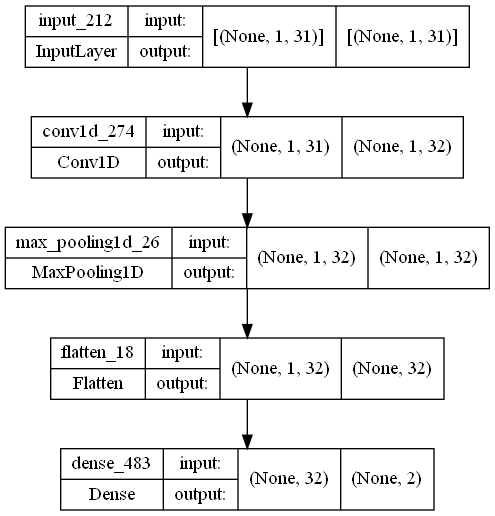

In [61]:
cnn_input = Input(shape=(cnn_train_x.shape[1:]))

cnn_conv_1 = Conv1D(32, kernel_size=1, padding='valid', activation='relu')(cnn_input)
cnn_pool_1 = MaxPooling1D(1)(cnn_conv_1)
cnn_flat_1 = Flatten()(cnn_pool_1)
cnn_dense_1 = Dense(2, activation='softmax')(cnn_flat_1)
model = tf.keras.Model(inputs=[cnn_input], outputs=[cnn_dense_1])

dot_img_file = './latex_document/figures/results/cnn/model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)